# AMBPA Batch 15 - BDM2 - Individual Assignment
<hr/>

<h3>Submission by :</h3>
<h4  style='color:#a1a1a1'><strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Deep Kamal Singh</strong></h4>
<h4  style='color:#a1a1a1'><strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;PGID: 012020053 </strong></h4>
<h4  style='color:#a1a1a1'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="mailto:Deepkamal_Singh_AMPBA2021w@isb.edu">deepkamal_singh_ampba2021w@isb.edu</a></h4>

<hr/>

## Assignment Problem Statement

Big Data Management Assignment for AMPBAA large retail store, which sells daily groceries wants to analyze customer traits and association patterns among various products it is selling

### Dataset


The dataset contains all orders checked out by customers for about 3 month in 2015. 
 - **SKU**–Stock Keeping Unit. A unique product code.
 - **OrderNum**–Order number (i.e. transaction id)
 - **CustomerID**–Unique Customer id 
 - **Sale Price**–Sold Price (what the customer has paid for the item bought in the order).
 - **SKU Description**–Description of the product.
 - **Created On**–The date on which the customer has created the order.
 - **Category**–The category of the product (SKU). There are about 11 categories.
 
 ### RFM Analysis
 
RFM stands for Recency, Frequency, and Monetary value, each referring to key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.


    a) Calculate the RFM values for each customer (by customer id).The result set should have customer id, recency, frequency and monetary value columns.
 
 RFM can be calculated as follows:
 
* **R (Recency)** –Time since the last order is made by the customer.For recency calculation, use 05/08/2015 as current date. So, recency will be the number of days before the date of 05/08/2015, the customer has made his or her last order.
* **F (Frequency)** –Total number of orders made by the customer.
* **M (Monetary Value)** –Total spend (sale price) by the customer including all his/her orders.

For detailed description of the terms, refer the link below

https://en.wikipedia.org/wiki/RFM_(customer_value)

    b)Find top 10 customers based on monetary value. 
    c)Find top 10 customers based on average spend by order i.e. (Monetary Value/Frequency)
    d)Draw the following three scatter plots and comment on your observations from the data
         o Monetary Value Vs. Frequency
         o Recency Vs. Frequency
         o Frequency Vs. Recency
         
### Association Rules Analysis:

The marketing department wants to build recommendation engine for cross selling of items across categories.The recommendations should be made within each specific category only.

    a) Find out top 10 association rules from any 3 different categories. There are SKUs from 11 different categories. You have the freedom to choose any three the categories. 
    
    b)The rules should be sorted based on confidence (highest to lowest) and the minimum value of lift should be 1.Please choose minimum support as applicable.
    
### Assessment Weightage:

Evaluation will not only be based on completing the above tasks, but also the following factors.
  1. Code clarity
  2. Documentation (use markdown)
  

**There may be penalty if code clarity and documentation is not proper.**

### Notebook Requirements:

The notebook should contain:
 1. The participantname.
 2. Clear description of the problem and dataset.
 3. Proper sections should be created for clarity.
 4. Insights and inferences should be described for understanding.
 5. There should be conclusion section with summary of accomplishment and few bulleted points of lessons learnt in developing the project.
 
**The Coding scheme for Individual Assignmentis 2N-c**

### Deliverables:
The deliverables should be the notebook with all outputs from the complete run of the notebook and thedatasets.

Do NOT submit .zip files otherwise, the submission will not be considered.

<hr/>

## Solutions

### Initial Setup

* Here we are using local System -  16 Cores, 16GB Ram, Core i9 

* Spark version 3.1.1

* Python version 3.9.4

*Note : -  that while running this Notebook on Databricks, we dont have have to exclusively create `spark` session variable, its available in the environment.*

#### Pre-readiness

In [1]:
!/usr/local/Cellar/jupyterlab/3.0.14/libexec/bin/pip install pyspark
!/usr/local/Cellar/jupyterlab/3.0.14/libexec/bin/pip install pandas

In [2]:
from pyspark import SparkConf, SparkContext,SparkFiles
from pyspark.sql import *

spark = SparkSession.builder \
.master("local") \
.appName("BDM2-IndividualAssignment") \
.getOrCreate()

In [3]:
#spark instance details
spark

### Loading the data (Loading Zone Pipeline)

In [4]:
market_data = spark.read.option("header", "true").csv("retail_orders_new.csv")

market_data.printSchema()

root
 |-- SKU: string (nullable = true)
 |-- OrderNum: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Sale Price: string (nullable = true)
 |-- SKU Description: string (nullable = true)
 |-- Created On: string (nullable = true)
 |-- Category: string (nullable = true)



Viewing few records to make better sense of data:

In [5]:
market_data.show(3)

+--------------------+--------------------+--------------------+----------+--------------------+----------+----------+
|                 SKU|            OrderNum|          CustomerID|Sale Price|     SKU Description|Created On|  Category|
+--------------------+--------------------+--------------------+----------+--------------------+----------+----------+
|f75e538a2f09412c1...|d425df23bad77cc7c...|8d34f365c820dfb19...|      30.0|Tide - Naturals D...|2015-06-17|1007832572|
|f75e538a2f09412c1...|3f0fd60a603d3fa66...|cc1cea2a27f709c4b...|      30.0|Tide - Naturals D...|2015-07-21|1007832572|
|f75e538a2f09412c1...|68dc00a2c48469f8a...|1dba75f19d61b8fd1...|      30.0|Tide - Naturals D...|2015-06-17|1007832572|
+--------------------+--------------------+--------------------+----------+--------------------+----------+----------+
only showing top 3 rows



Running a descriptive summary analysis on the data (as part of EDA)

In [6]:
market_data.describe().show()

+-------+--------------------+--------------------+--------------------+-----------------+--------------------+----------+--------------------+
|summary|                 SKU|            OrderNum|          CustomerID|       Sale Price|     SKU Description|Created On|            Category|
+-------+--------------------+--------------------+--------------------+-----------------+--------------------+----------+--------------------+
|  count|              244661|              244661|              244661|           244661|              244639|    244661|              244661|
|   mean|                null|                null|                null|68.43356207160515|                null|      null|2.4763909962667975E9|
| stddev|                null|                null|                null|  91.879780080073|                null|      null| 7.977923307610747E8|
|    min|00004ed30987b9eb5...|0001c344327e4eab6...|000197205f2a637f2...|              0.0|18 Herbs - Ghee -...|2015-06-02|          1007

### Observing the data

* Dataset contains 244661 records
* Apart from `SKU Description` all other fields dont have any missing values
* `Created On` to be converted to `Date` field type 
* `Sale Price` can be converted to `Float` type
* After type conversion this summary can be extracted again to gain further meaningful insights
* Removing spaces from Field name - this makes it compatible for columnar storage


#### Importing required libraries

In [7]:
import pyspark.sql.functions as fns
from pyspark.sql.functions import col
from pyspark.sql.functions import to_date
from pyspark.sql.types import *
from datetime import datetime

### Casting columns to right data types

In [8]:
market_data = market_data.select(['SKU','OrderNum','CustomerID',
                                  col('Sale Price').cast(FloatType()).alias('SalePrice'),
                                  col('SKU Description').alias('SKUDescription'),
                                  to_date("Created On","yyyy-MM-dd").alias('CreatedOn'), 
                                  col('Category')])


market_data.printSchema()

root
 |-- SKU: string (nullable = true)
 |-- OrderNum: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- SalePrice: float (nullable = true)
 |-- SKUDescription: string (nullable = true)
 |-- CreatedOn: date (nullable = true)
 |-- Category: string (nullable = true)



In [9]:
market_data.show(3)

+--------------------+--------------------+--------------------+---------+--------------------+----------+----------+
|                 SKU|            OrderNum|          CustomerID|SalePrice|      SKUDescription| CreatedOn|  Category|
+--------------------+--------------------+--------------------+---------+--------------------+----------+----------+
|f75e538a2f09412c1...|d425df23bad77cc7c...|8d34f365c820dfb19...|     30.0|Tide - Naturals D...|2015-06-17|1007832572|
|f75e538a2f09412c1...|3f0fd60a603d3fa66...|cc1cea2a27f709c4b...|     30.0|Tide - Naturals D...|2015-07-21|1007832572|
|f75e538a2f09412c1...|68dc00a2c48469f8a...|1dba75f19d61b8fd1...|     30.0|Tide - Naturals D...|2015-06-17|1007832572|
+--------------------+--------------------+--------------------+---------+--------------------+----------+----------+
only showing top 3 rows



In [10]:
market_data.describe().show()

+-------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+
|summary|                 SKU|            OrderNum|          CustomerID|        SalePrice|      SKUDescription|            Category|
+-------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+
|  count|              244661|              244661|              244661|           244661|              244639|              244661|
|   mean|                null|                null|                null|68.43356207962728|                null|2.4763909962667975E9|
| stddev|                null|                null|                null| 91.8797800504509|                null| 7.977923307610747E8|
|    min|00004ed30987b9eb5...|0001c344327e4eab6...|000197205f2a637f2...|              0.0|18 Herbs - Ghee -...|          1007832320|
|    max|fffe5c582499b3c56...|fff90f9fb77654752...|fff7df5a4d7b590da.

#### Further analysis on data after type conversion
* Now we have `Sale Price` in `Float`,  `Created On` in `Date` and `Category` also in `Integer` type
* Average `Sale Price` is 68.43 
* There is no negative value of `Sale Price`,  which means the dataset does not have any Returns record
* Maximum `Sale Price` is 5800
* Since we are not going to do analysis on `SKUDescription` we can drop this field

**Dropping `SKU Description`**

In [11]:
market_data = market_data.drop('SKUDescription')

In [12]:
db_name='CLEAN_MARKET_DATA'
market_data.write.mode('overwrite').parquet(db_name)

**Now our data is ready for analysis**

Table name : **CLEAN_MARKET_DATA**

<hr/>

### RFM Analysis on Data

For this we need to load the Data from clean table we created in previous pipeline

Further we need to `groupBy` by `CustomerID`, `OrderNum` and then `aggregate` the data for various calculations to get Recency, Frequency and MonetaryValue

In [13]:
clean_market_data = spark.read.parquet("CLEAN_MARKET_DATA")

#### Checking data partition

In [14]:
clean_market_data.rdd.getNumPartitions()

1

**Since we have 16 cores, we can repartition the data to 16 partitions**

In [15]:
clean_market_data=clean_market_data.repartition(16)
clean_market_data.rdd.getNumPartitions()

16

In [41]:
from pyspark.sql.functions import datediff,lit

We will now create matrix of Customer's R,F,M values

For this, we have this pipeline

$[MARKET\ DATA] \rightarrow\ <SELECT\ (customer,DATEDIFF(Created,2015/08/05))>\ \rightarrow\ <GROUPBY([CustomerId,OrderNum])>\ 
\rightarrow\ <SUM(SalePrice)> \rightarrow\ <GROUPBY(CustomerId)>\ \rightarrow\ 
<Aggregation(Frequency=count, Recency=min(CreatedOn),MonetaryValue=Sum(SalePrice))>\ \rightarrow\
<SELECT (CUSTOMER,Recency, Frequency,MonetaryValue)>\ \rightarrow\ [CUSTOMER\ RFM\ DATA]$

In [18]:
customer_rfm_data=clean_market_data.select(['CustomerId',col('CreatedOn').alias('Recency'),'SalePrice','OrderNum'])\
.withColumn("Recency", datediff(to_date(lit('2015-08-05'),'yyyy-MM-dd'),"Recency"))\
.groupBy(['CustomerId','OrderNum']).agg({'Recency':'min','SalePrice':'sum'})\
.select(['CustomerId','OrderNum',col('min(Recency)').alias('Recency'),col('sum(SalePrice)').alias('SalePrice')])\
.groupBy('CustomerId').agg({'OrderNum':'count','Recency':'min', 'SalePrice':'sum'})\
.select([col('CustomerId'),col('min(Recency)').alias('Recency'),col('count(OrderNum)').alias('Frequency'),col('sum(SalePrice)').alias('MonetaryValue')])


### Saving RFM data in table (Staging Zone)

saving data in columnar format, further analysis will be done on loaded data

In [19]:
rfm_table_name='CUSTOMER_RFM_DATA'
customer_rfm_data.orderBy('Recency').write.mode('overwrite').parquet(rfm_table_name)

In [20]:
customer_rfm_data= spark.read.parquet("CUSTOMER_RFM_DATA").repartition(16)

### a) Showing the RFM values for each customer

In [21]:
customer_rfm_data.orderBy('MonetaryValue',ascending=False).show()

+--------------------+-------+---------+------------------+
|          CustomerId|Recency|Frequency|     MonetaryValue|
+--------------------+-------+---------+------------------+
|5337f8fe3ae294205...|      5|       13|41648.400007247925|
|97e13a1aa7d85ab49...|      6|       19| 38565.08999443054|
|fbfd657f269478b07...|      4|       36| 36958.37000465393|
|ef102fa646f2b49e3...|      7|       12|           35447.5|
|821521c5e9366ead9...|     16|       14| 33546.65000152588|
|859874fe52a96807c...|      4|       13|          32834.75|
|10415339f9428e6ab...|      8|        8| 30826.48999786377|
|af3a4a3ec3f742efa...|      3|       23| 30600.09999847412|
|cdf4b7a51cb8ebd00...|      3|       26|27120.350006103516|
|cdda28301f50d6a7d...|     16|       13|26854.750007629395|
|2080500fa09a297d3...|      8|       10|           26290.5|
|36749a1461de5b9ad...|      9|       17|25987.300003051758|
|7aae9fcc40c695c4f...|     19|        7|           24574.0|
|683ff46873732d817...|      7|       13|

### b) Fetching Top 10 Customers by Monetary Value

In [22]:
customer_rfm_data.orderBy('MonetaryValue',ascending=False).show(10)

+--------------------+-------+---------+------------------+
|          CustomerId|Recency|Frequency|     MonetaryValue|
+--------------------+-------+---------+------------------+
|5337f8fe3ae294205...|      5|       13|41648.400007247925|
|97e13a1aa7d85ab49...|      6|       19| 38565.08999443054|
|fbfd657f269478b07...|      4|       36| 36958.37000465393|
|ef102fa646f2b49e3...|      7|       12|           35447.5|
|821521c5e9366ead9...|     16|       14| 33546.65000152588|
|859874fe52a96807c...|      4|       13|          32834.75|
|10415339f9428e6ab...|      8|        8| 30826.48999786377|
|af3a4a3ec3f742efa...|      3|       23| 30600.09999847412|
|cdf4b7a51cb8ebd00...|      3|       26|27120.350006103516|
|cdda28301f50d6a7d...|     16|       13|26854.750007629395|
+--------------------+-------+---------+------------------+
only showing top 10 rows



### c) Fetching Top 10 Customers based on average spend by order i.e. (Monetary Value/Frequency)

In [23]:
customer_rfm_data.select('CustomerId','Recency','Frequency','MonetaryValue',col('MonetaryValue')/col('Frequency'))\
.select('CustomerId','Recency','Frequency','MonetaryValue',col('(MonetaryValue / Frequency)').alias('AverageSpend'))\
.orderBy('AverageSpend',ascending=False).show(10)

+--------------------+-------+---------+------------------+------------------+
|          CustomerId|Recency|Frequency|     MonetaryValue|      AverageSpend|
+--------------------+-------+---------+------------------+------------------+
|56ecfac200e20e34f...|     29|        1|  8488.85000038147|  8488.85000038147|
|b3cdc10e104b835f0...|      6|        2|16800.100006103516| 8400.050003051758|
|3cc1a3a08aaa9d556...|     31|        2|14668.050008773804| 7334.025004386902|
|014969ab845c6270a...|     27|        1| 7311.699996948242| 7311.699996948242|
|54db0a81d6630aa42...|     37|        1| 7137.389999389648| 7137.389999389648|
|188742e9593f523c7...|     10|        1| 6586.400001525879| 6586.400001525879|
|218d05fea98ab2ae6...|     30|        1|6571.3099937438965|6571.3099937438965|
|8142e168c9a74b440...|      9|        2|13019.349983215332| 6509.674991607666|
|22eea6f7d4e148d4d...|      7|        1| 6470.800003051758| 6470.800003051758|
|c11bd2e29e45a002f...|     34|        1| 6454.000001

### Plotting Monetary Value Vs. Frequency

In [24]:
plot_df = customer_rfm_data.toPandas()

<AxesSubplot:title={'center':'MonetaryValue vs Frequency'}, xlabel='MonetaryValue', ylabel='Frequency'>

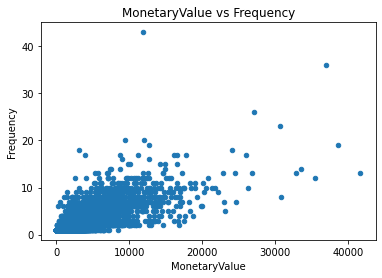

In [25]:
plot_df[['MonetaryValue','Frequency']].plot.scatter(x='MonetaryValue',y='Frequency',title='MonetaryValue vs Frequency')

<AxesSubplot:title={'center':'Frequency vs MonetaryValue'}, xlabel='Frequency', ylabel='MonetaryValue'>

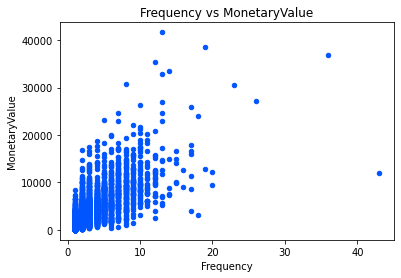

In [26]:
plot_df[['MonetaryValue','Frequency']].plot.scatter(y='MonetaryValue',x='Frequency',color='#0055FF',title='Frequency vs MonetaryValue')

#### Plotting Recency Vs. Frequency
     
     

<AxesSubplot:title={'center':'Recency Vs Frequency'}, xlabel='Recency', ylabel='Frequency'>

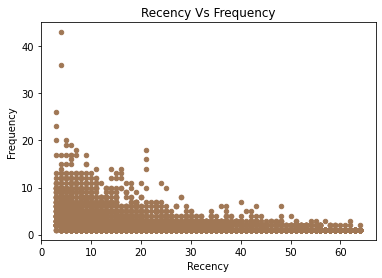

In [27]:
plot_df[['Recency','Frequency']].plot.scatter(x='Recency',y='Frequency', color='#A07755', title='Recency Vs Frequency')

#### Frequency Vs. Recency

<AxesSubplot:title={'center':'Frequency Vs Recency'}, xlabel='Frequency', ylabel='Recency'>

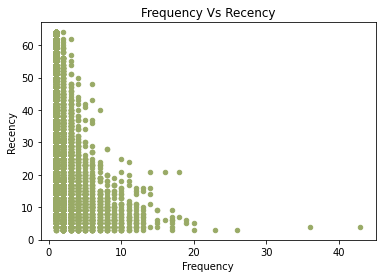

In [28]:
plot_df[['Recency','Frequency']].plot.scatter(y='Recency',x='Frequency', color='#99AA66', title='Frequency Vs Recency')

### Analysis of scatter plots

#### **Monetary Value and Frequency**

 * Most of the Customer's shopping frequency remain below 12
 * Subsequently, most customer's average Monetary value lie within 20000.
 * There is no single visit high value transaction
 * Along with the increase in visit frequency, the order amount is also increasing as value lower side is increasing
 * There are outliers who have exceptionally high Monetary spend, and there are outliers who have visited stores exceptionally high number of times, with relative increased spends too
 * We can infer that for large amount purchases, customer tends to visit store often, before finally making a purchase
 * Monetary Value with Frequency plot gives us key insight of shopping patterns with respect to revisits done by customer

As a further step, store owner should keep track of Customers who are visiting store often but not checking out - and their product browse history should be understood to provide them better experience for their next visit, towards an effort to solve all their queries about the product they are interested in and lucrative spot discounts can be offered to make it easy for them to take decision.

#### **Recency and Frequency**

 * Most customers have visited the store 0-10 times and purchased something within 20 days of given date
     * If its data from online-stores, the data can be originating from users browsing in private mode.
 * There are customer's who have just visited store once
 * There are outliers - showing very high frequency visits but recency is older than 20 days, 
     * It can be this segment of customers who have moved on to some other avenue for their shopping needs, or they have changed their addresses - appropriate strategy must be formed to include these segment back to profitable segment


### Association Rules analysis

In [29]:
clean_market_data = spark.read.parquet("CLEAN_MARKET_DATA").repartition(16)

    a) Find out top 10 association rules from any 3 different categories. There are SKUs from 11 different categories. You have the freedom to choose any three the categories. 
    b) The rules should be sorted based on confidence (highest to lowest) and the minimum value of lift should be 1.Please choose minimum support as applicable.

Now we need to get the categories grouped By the `SKU Items` - and find the association from it, we try to list out unique Categories and their respective SKU count

In [30]:
clean_market_data.select(['Category']).groupBy('Category').count().orderBy('count').show()

+----------+-----+
|  Category|count|
+----------+-----+
|2007831705| 1028|
|2007832497| 2261|
|1007832320| 9082|
|3007832546|14711|
|1007832368|19086|
|1007832572|19230|
|2007832529|31938|
|3007832354|54384|
|3007832502|92941|
+----------+-----+



We sorted the categories in ascending order of their items counts, and we pick 3 categories from middle, 

<div style='color:#0A0f0f;font-size:1.2em'> 3007832546 </div>
<div style='color:#0A0f0f;font-size:1.2em'> 1007832368 </div>
<div style='color:#0A0f0f;font-size:1.2em'> 1007832572 </div>

***Now we will filter out remaining records***

In [31]:
category_1_market_data = clean_market_data.withColumn('Category',col('Category').cast(LongType())).where((col('Category')==3007832546))
category_2_market_data = clean_market_data.withColumn('Category',col('Category').cast(LongType())).where((col('Category')==1007832368))
category_3_market_data = clean_market_data.withColumn('Category',col('Category').cast(LongType())).where((col('Category')==3007832546))

In [32]:
category_3_market_data.groupBy('Category').count().orderBy('count').show()

+----------+-----+
|  Category|count|
+----------+-----+
|3007832546|14711|
+----------+-----+



In [50]:
from pyspark.ml.fpm import FPGrowth

MIN_SUPPORT=0.001
MIN_CONFIDENCE=0.3
MIN_LIFT=1

Preparing orderwise SKU list of items - grouping by OrderNum and Category first - so that we prepare matching sets on items belonging to same category and then flat-listing included SKUs

$[MARKET\ DATA]\rightarrow\ <SELECT\ (Order,Category,SKU)>\ \rightarrow\
<GROUP BY(Order, Category)>\ \rightarrow\ <Collect\ List\ (SKU)>\ \rightarrow\ <SELECT\ (Order,SKU\ List)>\ \rightarrow[ORDER\ WISE\ SKU\ LIST]$

In [51]:
orderwise_skulist1=category_1_market_data.select(['OrderNum','Category','SKU'])\
.groupBy('Category','OrderNum').agg({'SKU':'collect_list'})\
.select([col('OrderNum'),col('collect_list(SKU)').alias('SKU_list')])
orderwise_skulist2=category_2_market_data.select(['OrderNum','Category','SKU'])\
.groupBy('Category','OrderNum').agg({'SKU':'collect_list'})\
.select([col('OrderNum'),col('collect_list(SKU)').alias('SKU_list')])
orderwise_skulist3=category_3_market_data.select(['OrderNum','Category','SKU'])\
.groupBy('Category','OrderNum').agg({'SKU':'collect_list'})\
.select([col('OrderNum'),col('collect_list(SKU)').alias('SKU_list')])



We are building out FP Model now. 

The FP-Growth modelling algo implemented with `pyspark.ml.fpm` supports 3 hyper-parameters

**MIN_SUPPORT**: the minimum support for an itemset to be identified as frequent. For example, if an item appears 3 out of 5 transactions, it has a support of $3/5=0.6$

**MIN_CONFIDENCE**: minimum confidence for generating Association Rule. Confidence is an indication of how often an association rule has been found to be true. For example, if in the transactions itemset X appears 4 times, X and Y co-occur only 2 times, the confidence for the rule $X \Rightarrow Y$ is then $2/4 = 0.5$. The parameter will not affect the mining for frequent itemsets, but specify the minimum confidence for generating association rules from frequent itemsets.

And 

**NUM_PARTITION** : this is to set spark.ml to use defined number of partitions only, however default value is partitions in source data, thus we need not to explicitly define it 

In [52]:
fpm_model = FPGrowth(itemsCol="SKU_list", minSupport=MIN_SUPPORT, minConfidence=MIN_CONFIDENCE)
fitted_model_1 = fpm_model.fit(orderwise_skulist1)
fitted_model_2 = fpm_model.fit(orderwise_skulist2)
fitted_model_3 = fpm_model.fit(orderwise_skulist3)

In [53]:
fitted_model_1

FPGrowthModel: uid=FPGrowth_4180ddba4347, numTrainingRecords=5560

In [54]:
ten_assoc_rules_1 = fitted_model_1.associationRules
ten_assoc_rules_2 = fitted_model_2.associationRules
ten_assoc_rules_3 = fitted_model_3.associationRules

### Finding top 10 rules for deployment based on confidence

#### Category 1 - 3007832546

In [55]:
ten_assoc_rules_1.where(col('lift')>MIN_LIFT).orderBy('confidence',ascending=False).show(10)


+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[f8e560d839d67d77...|[d56a54eab0b22498...| 0.8571428571428571|238.28571428571425|0.001079136690647482|
|[f8e560d839d67d77...|[d79e61ef9ca7bc7c...| 0.8571428571428571|238.28571428571425|0.001079136690647482|
|[af11147c496431d3...|[f1611b044aa31411...| 0.6363636363636364| 4.730189596499757|0.001258992805755...|
|[d56a54eab0b22498...|[f8e560d839d67d77...|                0.6|196.23529411764704|0.001079136690647482|
|[2ec8c43edafc84ab...|[f1611b044aa31411...|                0.6| 4.459893048128342|0.001079136690647482|
|[01e1d1226cf45575...|[f1611b044aa31411...| 0.5833333333333334| 4.336007130124778|0.001258992805755...|
|[d79e61ef9ca7bc7c...|[d56a54eab0b22498...|                0.5| 

#### Category 2 - 1007832368

In [56]:
ten_assoc_rules_2.where(col('lift')>MIN_LIFT).orderBy('confidence',ascending=False).show(10)


+--------------------+--------------------+------------------+------------------+--------------------+
|          antecedent|          consequent|        confidence|              lift|             support|
+--------------------+--------------------+------------------+------------------+--------------------+
|[0d7bb0307598634e...|[626145c59fbd529a...|               1.0|            178.75|0.001398601398601...|
|[0d7bb0307598634e...|[626145c59fbd529a...|0.7272727272727273|             130.0| 0.00203432930705658|
|[0885be25c70405fe...|[20d535b3afdd9c4f...|0.7272727272727273|56.633663366336634| 0.00101716465352829|
|[bde7d2478e702245...|[26910617f98748ba...|0.7222222222222222|284.01388888888886|0.001652892561983471|
|[47ff85276a94ad01...|[7192ccacf982dac5...|0.6923076923076923|34.462025316455694|0.001144310235219...|
|[71500042021f60fb...|[7192ccacf982dac5...|0.6923076923076923|34.462025316455694|0.001144310235219...|
|[0d7bb0307598634e...|[8953af1c5af1d395...|            0.6875|120.1597222

#### Category 3 - 1007832572 

In [57]:
ten_assoc_rules_3.where(col('lift')>MIN_LIFT).orderBy('confidence',ascending=False).show(10)


+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[f8e560d839d67d77...|[d56a54eab0b22498...| 0.8571428571428571|238.28571428571425|0.001079136690647482|
|[f8e560d839d67d77...|[d79e61ef9ca7bc7c...| 0.8571428571428571|238.28571428571425|0.001079136690647482|
|[af11147c496431d3...|[f1611b044aa31411...| 0.6363636363636364| 4.730189596499757|0.001258992805755...|
|[d56a54eab0b22498...|[f8e560d839d67d77...|                0.6|196.23529411764704|0.001079136690647482|
|[2ec8c43edafc84ab...|[f1611b044aa31411...|                0.6| 4.459893048128342|0.001079136690647482|
|[01e1d1226cf45575...|[f1611b044aa31411...| 0.5833333333333334| 4.336007130124778|0.001258992805755...|
|[d79e61ef9ca7bc7c...|[d56a54eab0b22498...|                0.5| 

In above outputs,the rules are sorted based on confidence (highest to lowest) and the minimum value of lift used is 1 - this is applied in where clause.

For model fitting, we have given support value of `0.001`

<hr/>

## Conclusion

### Summary of Accomplishments

#### Installation and Environment
* Apache Spark v3.1.1 was installed in distributed setup, where 2 laptops were used - one serving as Spark Master and worker and other laptop specifically as Spark Worker 
* During this project we learnt about Zoning the data, and how exporting a cleaned data to columnar format can be really good to resume work after restarting the kernel(cluster) - it saves initial time for pulling data from source, cleaning and then processing
* Doing live partitioning and repartitioning was done to understand its practical impact on data processing speed

#### Data processing

* Various intermediate (e.g select, filter, export) to advanced level(e.g. Grouping, aggregation, partitioning,conversion etc) Spark operation on DataFrame were performed, this process provided deeper upderstanding of how data is processed in Apache Spark, and the pitfalls of not curating the data properly
    * For example, the category column was initially converted to IntegerType - this resulted in missing value for more than 60% of categories, then LongType was used
* Pipelines were created to reduce data, process data and finally generate useful information out of the data
* The problem statement mentioned in the assignment questions were particularly interesting, as this is something that actually happens in the industry - r


### Learning

* Local Setup works fastest and is stable, Google colab also provides easy access to Spark based data analysis over google colab notebook, In Datacricks community edition can be used to have access to Apache Spark system - however Cluster's avaiability is often an issue with Databricks
* Appropriate patitioning is needed to make full use of Apache Spark's distributed processing capabilities
* Business objective must be understood clearly for right sizing of data and pipelines must be created for Loading to Staging zone data processing, as well as Staging to Curated zone data processing too.

### 

<hr/>

## References

* https://spark.apache.org/docs/2.3.0/mllib-frequent-pattern-mining.html
* https://en.wikipedia.org/wiki/Association_rule_learning
* https://spark.apache.org/docs/2.3.0/api/python/pyspark.mllib.html#pyspark.mllib.fpm.FPGrowth
* https://dl.acm.org/doi/10.1145/170035.170072

<hr/>
<div style='color:#a1a1a1'><center>END OF ASSIGNMENT REPORT</center></div>
<hr/>